In [1]:
# Import libraries.
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, plot_roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# GOAL: Create a machine learning model to accurately detect fraudulent credit card transactions.

<b>Dataset citations:</b>


Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015

Dal Pozzolo, Andrea; Caelen, Olivier; Le Borgne, Yann-Ael; Waterschoot, Serge; Bontempi, Gianluca. Learned lessons in credit card fraud detection from a practitioner perspective, Expert systems with applications,41,10,4915-4928,2014, Pergamon

Dal Pozzolo, Andrea; Boracchi, Giacomo; Caelen, Olivier; Alippi, Cesare; Bontempi, Gianluca. Credit card fraud detection: a realistic modeling and a novel learning strategy, IEEE transactions on neural networks and learning systems,29,8,3784-3797,2018,IEEE

Dal Pozzolo, Andrea Adaptive Machine learning for credit card fraud detection ULB MLG PhD thesis (supervised by G. Bontempi)

Carcillo, Fabrizio; Dal Pozzolo, Andrea; Le Borgne, Yann-Aël; Caelen, Olivier; Mazzer, Yannis; Bontempi, Gianluca. Scarff: a scalable framework for streaming credit card fraud detection with Spark, Information fusion,41, 182-194,2018,Elsevier

Carcillo, Fabrizio; Le Borgne, Yann-Aël; Caelen, Olivier; Bontempi, Gianluca. Streaming active learning strategies for real-life credit card fraud detection: assessment and visualization, International Journal of Data Science and Analytics, 5,4,285-300,2018,Springer International Publishing

Bertrand Lebichot, Yann-Aël Le Borgne, Liyun He, Frederic Oblé, Gianluca Bontempi Deep-Learning Domain Adaptation Techniques for Credit Cards Fraud Detection, INNSBDDL 2019: Recent Advances in Big Data and Deep Learning, pp 78-88, 2019

Fabrizio Carcillo, Yann-Aël Le Borgne, Olivier Caelen, Frederic Oblé, Gianluca Bontempi Combining Unsupervised and Supervised Learning in Credit Card Fraud Detection Information Sciences, 2019

Yann-Aël Le Borgne, Gianluca Bontempi Machine Learning for Credit Card Fraud Detection - Practical Handbook

In [2]:
# Load dataset. Source: https://www.kaggle.com/mlg-ulb/creditcardfraud
df = pd.read_csv("creditcard.csv")

In [3]:
# Preview data.
# Elements V1-V28 are abstract variables obtained from the dataset originators using PCA to protect card user data.
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [4]:
# Perform dropna to see if any rows with NA values exist.
count_1_pd = df.shape[0]
df = df.dropna()
count_2_pd = df.shape[0]
print('Rows before: {}'.format(count_1_pd))
print('Rows after: {}'.format(count_2_pd))

Rows before: 284807
Rows after: 284807


In [5]:
# Drop time column as it was identified by other Kaggle users to be unimportant.
# Split the data into train and test datasets.
df = df.drop(columns=['Time'])
X = df.drop(columns=['Class'])
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=12345)

In [6]:
# Scale the numeric data in X_train.
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
# Preview scaled X_train.
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.990566,0.738520,0.818409,0.263825,0.784478,0.225160,0.263913,0.785551,0.479178,0.513623,...,0.579150,0.561422,0.512423,0.667953,0.423023,0.569552,0.457684,0.415583,0.404025,0.000971
1,0.992124,0.734115,0.824143,0.180661,0.778982,0.216916,0.261954,0.784485,0.533672,0.489064,...,0.578701,0.559213,0.498536,0.671060,0.467688,0.555398,0.335322,0.417041,0.404722,0.000284
2,0.971878,0.745002,0.835608,0.294948,0.787897,0.231587,0.266577,0.787974,0.453472,0.505896,...,0.576813,0.563736,0.537862,0.665833,0.297028,0.605063,0.394916,0.417654,0.405486,0.000039
3,0.966123,0.726624,0.862393,0.295045,0.773304,0.238917,0.257815,0.791144,0.526093,0.500325,...,0.582948,0.563909,0.533747,0.659696,0.328369,0.600709,0.545207,0.416872,0.406580,0.007255
4,0.943797,0.748094,0.859731,0.255723,0.783407,0.225609,0.270150,0.785349,0.461207,0.493980,...,0.581767,0.557676,0.479268,0.665452,0.322681,0.580899,0.456323,0.416248,0.406041,0.003114


In [7]:
# Save scaler model for later use on test data.
pickle.dump(scaler, open("scaler.pkl", 'wb'))

In [8]:
# Fit model 1 - Logistic Regression.
model_logistic_regression = LogisticRegression(random_state=12345, max_iter=10000).fit(X_train, y_train)

In [9]:
# Reload MinMaxScaler and apply to test data.
scalerObj = pickle.load(open("scaler.pkl", 'rb'))
X_test = pd.DataFrame(scalerObj.transform(X_test))

In [10]:
# Evaluate the logistic regression model accuracy on test data.
model_logistic_regression.score(X_test, y_test)

0.9990285921608558

In [11]:
# Get predicted labels.
y_pred_logistic_regression = model_logistic_regression.predict(X_test)
# Get confusion matrix.
cf_logistic_regression = confusion_matrix(y_test, y_pred_logistic_regression)
print(cf_logistic_regression)

[[85286    12]
 [   71    74]]


In [12]:
# Show confusion matrix derivations.
print("True positive: {}".format(cf_logistic_regression[0][0]))
print("True negative: {}".format(cf_logistic_regression[1][1]))
print("False positive/Type I error: {}".format(cf_logistic_regression[1][0]))
print("False negative/Type II error: {}".format(cf_logistic_regression[0][1]))
print("Sensitivity: {}".format(cf_logistic_regression[0][0]/(cf_logistic_regression[0][0]+cf_logistic_regression[0][1])))
print("Specificity: {}".format(cf_logistic_regression[1][1]/(cf_logistic_regression[1][1]+cf_logistic_regression[1][0])))
print("Precision: {}".format(cf_logistic_regression[0][0]/(cf_logistic_regression[0][0]+cf_logistic_regression[1][0])))
print("Negative predictive value: {}".format(cf_logistic_regression[1][1]/(cf_logistic_regression[1][1]+cf_logistic_regression[0][1])))
print("False positive rate: {}".format(1 - cf_logistic_regression[0][0]/(cf_logistic_regression[0][0]+cf_logistic_regression[0][1])))
print("False negative rate: {}".format(1 - cf_logistic_regression[1][1]/(cf_logistic_regression[1][1]+cf_logistic_regression[1][0])))
print("Accuracy: {}".format((cf_logistic_regression[0][0]+cf_logistic_regression[1][1])/(cf_logistic_regression[0][0]+cf_logistic_regression[1][1]+cf_logistic_regression[1][0]+cf_logistic_regression[0][1])))

True positive: 85286
True negative: 74
False positive/Type I error: 71
False negative/Type II error: 12
Sensitivity: 0.9998593167483412
Specificity: 0.5103448275862069
Precision: 0.9991681994446853
Negative predictive value: 0.8604651162790697
False positive rate: 0.00014068325165883522
False negative rate: 0.4896551724137931
Accuracy: 0.9990285921608558


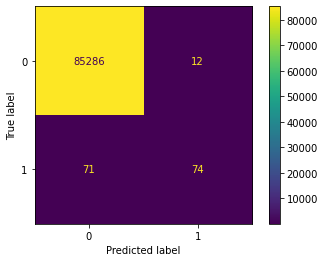

In [13]:
# Plot confusion matrix.
plot_confusion_matrix(model_logistic_regression, X_test, y_test)
plt.show()

The sensitivity/recall is pretty good at 99.986%. 

While the model is over 99.9% accurate, the specificity is too low. About half of the fraudulent transactions were flagged as legitimate.

In [14]:
# Fit model 2 - Random Forest.
model_random_forest = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=12345)
model_random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=12345)

In [15]:
# Evaluate the Random Forest regression model accuracy on test data.
model_random_forest.score(X_test, y_test)

0.9996137776061234

In [16]:
# Get predicted labels.
y_pred_random_forest = model_random_forest.predict(X_test)
# Get confusion matrix.
cf_random_forest = confusion_matrix(y_test, y_pred_random_forest)
print(cf_random_forest)

[[85294     4]
 [   29   116]]


In [17]:
# Show confusion matrix derivations.
print("True positive: {}".format(cf_random_forest[0][0]))
print("True negative: {}".format(cf_random_forest[1][1]))
print("False positive/Type I error: {}".format(cf_random_forest[1][0]))
print("False negative/Type II error: {}".format(cf_random_forest[0][1]))
print("Sensitivity: {}".format(cf_random_forest[0][0]/(cf_random_forest[0][0]+cf_random_forest[0][1])))
print("Specificity: {}".format(cf_random_forest[1][1]/(cf_random_forest[1][1]+cf_random_forest[1][0])))
print("Precision: {}".format(cf_random_forest[0][0]/(cf_random_forest[0][0]+cf_random_forest[1][0])))
print("Negative predictive value: {}".format(cf_random_forest[1][1]/(cf_random_forest[1][1]+cf_random_forest[0][1])))
print("False positive rate: {}".format(1 - cf_random_forest[0][0]/(cf_random_forest[0][0]+cf_random_forest[0][1])))
print("False negative rate: {}".format(1 - cf_random_forest[1][1]/(cf_random_forest[1][1]+cf_random_forest[1][0])))
print("Accuracy: {}".format((cf_random_forest[0][0]+cf_random_forest[1][1])/(cf_random_forest[0][0]+cf_random_forest[1][1]+cf_random_forest[1][0]+cf_random_forest[0][1])))

True positive: 85294
True negative: 116
False positive/Type I error: 29
False negative/Type II error: 4
Sensitivity: 0.9999531055827804
Specificity: 0.8
Precision: 0.9996601150920619
Negative predictive value: 0.9666666666666667
False positive rate: 4.689441721961174e-05
False negative rate: 0.19999999999999996
Accuracy: 0.9996137776061234


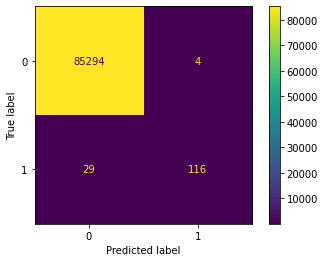

In [18]:
# Plot confusion matrix.
plot_confusion_matrix(model_random_forest, X_test, y_test)
plt.show()

Specificity for the Random Forest is at 80% - much better than the Logistic Regression.

Accuracy increased from 99.902% to 99.961%.

Sensitivity/recall increased from 99.986% to 99.995%.<br><br>

Let's try to ensure the ratio of actual legitimate to actual fraudulent payments is equal across train and test datasets. The dataset is imbalanced as is, with less than 2% of transactions being fraudulent.